##**Классификация прогнозов заработной платы**

Классификация по зарплате: меньше 50 тыс. или больше 50 тыс. Датасет взят с [Kaggle](https://www.kaggle.com/datasets/ayessa/salary-prediction-classification)

Данные были извлечены Барри Беккером из базы данных переписи населения 1994 года.
Задача состоит в определении того, зарабатывает ли человек более 50 тысяч долларов в год.

Столбцы данных:

- **```age```** (возраст): непрерывный
- **```workclass```** (тип занятости): 
  - Private - Частный 
  - Self-emp-not-inc - Самозанятый-не-в-системе 
  - Self-emp-inc - Самозанятый-в-системе 
  - Federal-gov - Федеральное правительство 
  - Local-gov - Местное-правительство 
  - State-gov - Штатное-правительство
  - Without-pay - Без-оплаты 
  - Never-worked - Никогда-не-работал
- **```fnlwgt```** (весовой коэффициент для каждого индивидуума в выборке): непрерывный
- **```education```** (образование): 
  - Bachelors - Бакалавр 
  - Some-college - Несколько колледжей 
  - 11th - 11 классов 
  - HS-grad - Среднее образование 
  - Prof-school - Профессиональная школа 
  - Assoc-acdm - Ассоциированная степень в области искусства или науки
  - Assoc-voc - Ассоциированная степень в области профессионального обучения
  - 9th - 9 классов 
  - 7th-8th - 7-8 классы 
  - 12th - 12 классов 
  - Masters - Магистр
  - 1st-4th - 1-4 классы 
  - 10th - 10 классов 
  - Doctorate - Доктор наук 
  - 5th-6th - 5-6 классы 
  - Preschool - Дошкольное образование.
- **```education-num```** (количество лет обучения): непрерывный.
- **```marital-status```** (семейное положение): 
  - Married-civ-spouse - Женат-гражданский-супруг 
  - Divorced - Разведен 
  - Never-married - Никогда-не-женат 
  - Separated - Разлучен 
  - Widowed - Овдовевший 
  - Married-spouse-absent - Женатый-супруг-отсутствует 
  - Married-AF-spouse - Женатый-супруг - военнослужащий ВВС.
- **```occupation```** (профессия): 
  - Tech-support - Техническая поддержка 
  - Craft-repair - Ремесло и ремонт 
  - Other-service - Другое обслуживание 
  - Sales - Продажи 
  - Exec-managerial - Исполнительный менеджмент 
  - Prof-specialty - Профессиональная специальность 
  - Handlers-cleaners - Уборщики-обслуживающего персонала
  - Machine-op-inspct - Машино-операторы-инспекторы
  - Adm-clerical - Административно-клерикальная работа 
  - Farming-fishing - Сельское хозяйство-рыболовство 
  - Transport-moving - Транспорт-перемещение 
  -  Priv-house-serv - Частный-домохозяйственный сервис
  - Protective-serv - Охрана-службы-безопасности 
  - Armed-Forces - Вооруженные силы
- **```relationship```** (отношения): 
  - Wife - Жена 
  - Own-child - Собственный ребенок 
  - Husband - Муж 
  - Not-in-family - Не-в-семье 
  - Other-relative - Другое-родство 
  - Unmarried - Неженатый
- **```race```** (раса): 
  - White - Белый 
  - Asian-Pac-Islander - Азиатско-Тихоокеанский-островитянин 
  - Amer-Indian-Eskimo - Американский-индеец-эскимос 
  - Other - Другое 
  - Black - Черный
- **```sex```** (пол): 
  - Female - Женский 
  - Male - Мужской
- **```capital-gain```** (прирост капитала): непрерывный
- **```capital-loss```** (потеря капитала): непрерывный
- **```hours-per-week```** (часов в неделю): непрерывный.
- **```native-country```** (родная страна): США, Камбоджа, Англия, Пуэрто-Рико, Канада, Германия, Внешние-США(Гуам-СШАВИ-и т.д.), Индия, Япония, Греция, Южная Корея, Китай, Куба, Иран, Гондурас, Филиппины, Италия, Польша, Ямайка, Вьетнам, Мексика, Португалия, Ирландия, Франция, Доминиканская Республика, Лаос, Эквадор, Тайвань, Гаити, Колумбия, Венгрия, Гватемала, Никарагуа, Шотландия, Таиланд, Югославия, Сальвадор, Тринидад-и-Тобаго, Перу, Гонконг, Голландия-Нидерланды.
- **```salary```** (зарплата): <=50K или >50K.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.preprocessing import (FunctionTransformer, OneHotEncoder,
                                   PolynomialFeatures, QuantileTransformer, StandardScaler)
from sklearn.utils import shuffle

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (roc_curve, auc, roc_auc_score, f1_score, 
                             confusion_matrix, precision_recall_curve)

import requests
from joblib import dump, load

random_state=5555

Путь к датасету на Goofle Drive:

Функции и класс для подсчёта метрик и отрисовки матрицы ошибок и ROC-кривой:

In [2]:
def plot_confusion_matrix(cnf_matrix, y_test, preds):
    """функция для отрисовки confusion_matrix и ROC-кривой"""
    
    cmap = sns.color_palette('flare', as_cmap=True)
    fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
    ax1, ax2 = ax.flatten()

    sns.heatmap(cnf_matrix, annot=True, cmap=cmap, fmt='g', linewidths=5, vmin=10, ax=ax[0])
    ax1.set_xlabel('предсказанные значения')
    ax1.set_ylabel('истинные значения')
    ax1.set_title(f'матрица ошибок\n[TN, FP]\n[FN, TP]')

    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, color='#A93226', lw=2, label=f'ROC curve (S={roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='#CB4335', lw=2, linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('FPR', fontweight='bold')
    ax2.set_ylabel('TPR', fontweight='bold')
    ax2.set_title('ROC-кривая')
    ax2.legend(loc='lower right')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.get_xaxis().tick_bottom()
    ax2.get_yaxis().tick_left()
    ax2.grid(linewidth=0.25);


def rename_keys(d, prefix):
    """функция убирает префикс из названия ключа"""
    
    return {k.replace(prefix, ''): v for k, v in d.items()}


def get_metrics(y_test, preds):
    """подсчёт метрик"""
    
    precision, recall, thresholds = precision_recall_curve(y_test, preds)

    fscore = (2 * precision * recall) / (precision + recall + 1e-9)
    # поиск индекса наибольшего значения F
    ix = np.argmax(fscore)
    auc = roc_auc_score(y_test, preds)

    return thresholds[ix], fscore[ix], precision[ix], recall[ix], roc_auc_score(y_test, preds)


def downsample(features, target, fraction):
    """downsample-балансировка"""
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=random_state)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=random_state)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=random_state)
    return features_downsampled, target_downsampled


class DataFrameEditor:
    """класс формирует сводный датафрейм со значениями метрик"""
    
    def __init__(self, df=None):
        if df is None:
            self.df = pd.DataFrame(columns=['name_model', 'F1_predict', 'F1_best_thresh', 
                                            'Precision', 'Recall', 'ROC AUC', 'thresholds'])
        else:
            self.df = df
    
    def add_row(self, values_dict):
        """метод добавляет новые строки в датафрейм"""

        new_row = pd.DataFrame(values_dict, index=[0])
        self.df = pd.concat([self.df, new_row], ignore_index=True)
    
    
    def model_performance_report(self, pipeline, X_train, X_test, y_train, y_test,
                                 name_model, downsampling=False, not_plot=False, save_model=False):
        """в методе обучается модель по переданным параметрам"""

        if downsampling:
            X_train_, y_train_ = downsample(X_train, y_train, downsampling)
            pipeline.fit(X_train_, y_train_)          
        else:
            pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

        thresholds, fscore, precision, recall, ROC_AUC = get_metrics(y_test, y_pred_proba)
        f1 = f1_score(y_test, y_pred)

        cnf_matrix = confusion_matrix(y_test, y_pred_proba > thresholds)
        
        if not not_plot and not save_model:
            plot_confusion_matrix(cnf_matrix, y_test, y_pred_proba)
        if not save_model:
            self.add_row({'name_model': name_model, 'F1_predict': [f1], 'F1_best_thresh': [fscore], 
                          'Precision': [precision], 'Recall': [recall], 'ROC AUC': [ROC_AUC], 'thresholds': [thresholds]}) 
        else:
            dump(pipeline, f'{save_model}.joblib')
            print(f'Успех! модель сохранена под именем "{save_model}.joblib"')

Читаем датасет, смотрим на него:

In [3]:
try:
    df_response = requests.get('https://drive.google.com/uc?id=1BCFr4zjOocmS5qlgtqjuURH7fhBh3uhc')
    with open('salary.csv', 'wb') as file:
        file.write(df_response.content)
    df = pd.read_csv('salary.csv')
except FileNotFoundError:
    print('файла нетути')

display(df.head(), df.tail())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
num_cols, cat_cols = [], []
for num, i in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[i]):
        print(f'{num+1}) {i} (числовой), оригинальных значений: {len(df[i].unique())}')
        num_cols.append(i)
    elif pd.api.types.is_object_dtype(df[i]):
        print(f'{num+1}) {i} (категориальный), оригинальных значений: {len(df[i].unique())}')
        cat_cols.append(i)
print(f'\nитого:\nчисловых: {len(num_cols)}\nкатегориальных: {len(cat_cols)}') 

1) age (числовой), оригинальных значений: 73
2) workclass (категориальный), оригинальных значений: 9
3) fnlwgt (числовой), оригинальных значений: 21648
4) education (категориальный), оригинальных значений: 16
5) education-num (числовой), оригинальных значений: 16
6) marital-status (категориальный), оригинальных значений: 7
7) occupation (категориальный), оригинальных значений: 15
8) relationship (категориальный), оригинальных значений: 6
9) race (категориальный), оригинальных значений: 5
10) sex (категориальный), оригинальных значений: 2
11) capital-gain (числовой), оригинальных значений: 119
12) capital-loss (числовой), оригинальных значений: 92
13) hours-per-week (числовой), оригинальных значений: 94
14) native-country (категориальный), оригинальных значений: 42
15) salary (категориальный), оригинальных значений: 2

итого:
числовых: 6
категориальных: 9


Переведём целевую переменную в бинарный вид, где:
- 0 - зарплата ниже 50К
- 1 - зарплата выше 50К

In [6]:
df['salary'] = (df['salary'] == ' >50K').astype(int)
df.salary.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

Разобъём данные на train и test с применением стратификации:

In [7]:
# бьём на train и test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='salary'), df['salary'], test_size=.4, random_state=random_state, stratify=df['salary'])

# и разбиваем test пополам -  на test и valid. Они будуи составлять по 20% от df
X_test, X_valid, y_test, y_valid = train_test_split(
    X_test, y_test, test_size=.5, random_state=random_state, stratify=y_test)

Посмотрим получившиеся размеры:

In [8]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((19536, 14), (19536,), (6513, 14), (6513,), (6512, 14), (6512,))

In [9]:
print(f'доля X_test = {X_test.shape[0]/df.shape[0]:.2%}')

доля X_test = 20.00%


Проверим соотношение классов, оно должно быть в равных пропорциях во всех выборках:

In [10]:
y_train.value_counts(), y_valid.value_counts(), y_test.value_counts()

(0    14832
 1     4704
 Name: salary, dtype: int64,
 0    4944
 1    1569
 Name: salary, dtype: int64,
 0    4944
 1    1568
 Name: salary, dtype: int64)

Сохраним тестовую выборку:

In [11]:
dump(X_test, 'X_test.joblib')
dump(y_test, 'y_test.joblib')

['y_test.joblib']

Соберём пайплайн:

In [12]:
num_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
bin_features = ['sex']

In [13]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]


class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    # def lower_strip(self, X):
    #     return self.columns.str.lower().str.strip()

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key, drop_first=True).columns]
        return self

    def transform(self, X):
        #X = lower_strip(X)
        X = pd.get_dummies(X, prefix=self.key, drop_first=True)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]


def lower_strip(x):
    return x.str.lower().str.strip()

In [14]:
final_transformers = list()
for cat_col in cat_features:
    cat_transformer = Pipeline([
        ('selector', FeatureSelector(column=cat_col)),
        ('lower_strip', FunctionTransformer(func=lower_strip, validate=False)),
        ('ohe', OHEEncoder(key=cat_col)),
        ])
    final_transformers.append((cat_col, cat_transformer))

for num_col in num_features:
    num_transformer = Pipeline([
        ('selector', NumberSelector(key=num_col)),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=5, include_bias=False)),
        ])
    final_transformers.append((num_col, num_transformer))

for bin_col in bin_features:
    bin_transformer = Pipeline([
        ('selector', FeatureSelector(column=bin_col))])
    
feats = FeatureUnion(final_transformers)

Предскажем тремя алгоритмами и выберем лучший:

In [15]:
pipeline_list = list()

### LogisticRegression

,name_model,F1_predict,F1_best_thresh,Precision,Recall,ROC AUC,thresholds
0,"LogisticRegression(class_weight='balanced', max_iter=10000, random_state=5555,\n solver='liblinear', tol=1e-06)",0.683473,0.70094,0.689698,0.712556,0.91027,0.694721


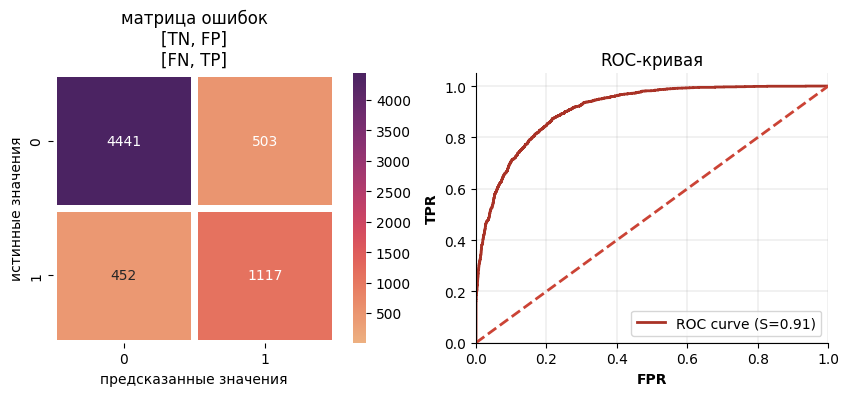

In [16]:
pipeline = Pipeline([
    ('features', feats),
    ('classifier', LogisticRegression(solver='liblinear', random_state=random_state, class_weight='balanced', max_iter=10000, tol=1e-6))])
pipeline_list.append(pipeline)
df_editor = DataFrameEditor()
df_editor.model_performance_report(pipeline, X_train, X_valid, y_train, y_valid, str(pipeline[-1]))
df_editor.df.iloc[[-1]]

### RandomForestClassifier

,name_model,F1_predict,F1_best_thresh,Precision,Recall,ROC AUC,thresholds
1,"RandomForestClassifier(class_weight='balanced', max_depth=10,\n min_samples_split=14, n_estimators=200,\n random_state=5555)",0.680269,0.701276,0.655938,0.753346,0.909818,0.596285


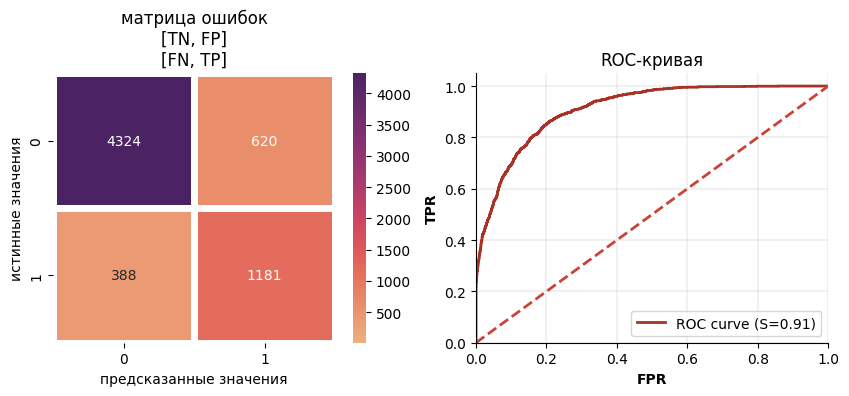

In [17]:
pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=14, class_weight='balanced', random_state=random_state))])
pipeline_list.append(pipeline)
df_editor.model_performance_report(pipeline, X_train, X_valid, y_train, y_valid, str(pipeline[-1]))
df_editor.df.iloc[[-1]]

### GradientBoostingClassifier

,name_model,F1_predict,F1_best_thresh,Precision,Recall,ROC AUC,thresholds
2,"GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=300,\n random_state=5555, subsample=0.7)",0.703603,0.715368,0.682081,0.752071,0.915359,0.589355


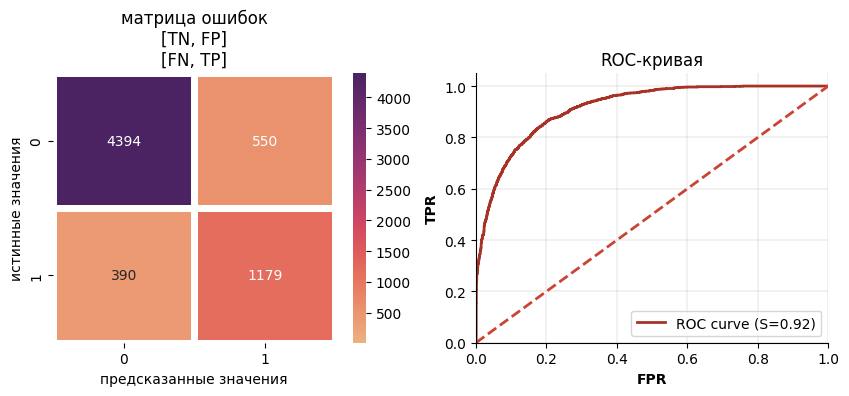

In [18]:
pipeline = Pipeline([
    ('features', feats),
    ('classifier', GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.7, random_state=random_state))])
pipeline_list.append(pipeline)
df_editor.model_performance_report(pipeline, X_train, X_valid, y_train, y_valid, str(pipeline[-1]), downsampling=0.45)
df_editor.df.iloc[[-1]]

Сравним результаты:

In [19]:
df_editor.df.sort_values('F1_best_thresh', ascending=False)

,name_model,F1_predict,F1_best_thresh,Precision,Recall,ROC AUC,thresholds
2,"GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=300,\n random_state=5555, subsample=0.7)",0.703603,0.715368,0.682081,0.752071,0.915359,0.589355
1,"RandomForestClassifier(class_weight='balanced', max_depth=10,\n min_samples_split=14, n_estimators=200,\n random_state=5555)",0.680269,0.701276,0.655938,0.753346,0.909818,0.596285
0,"LogisticRegression(class_weight='balanced', max_iter=10000, random_state=5555,\n solver='liblinear', tol=1e-06)",0.683473,0.700940,0.689698,0.712556,0.910270,0.694721


Градиентный бустинг показал лучшие результаты, будем использовать его:

In [20]:
pipeline_list[2]

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('workclass',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='workclass')),
                                                                 ('lower_strip',
                                                                  FunctionTransformer(func=<function lower_strip at 0x7ff6f0b20160>)),
                                                                 ('ohe',
                                                                  OHEEncoder(key='workclass'))])),
                                                ('education',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='education')),
                                                                 ('lower_strip',
                                                                  F...
                                                                                     include_bias=False))])),
                                                ('hours-per-week',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='hours-per-week')),
                                                                 ('imputer',
                                                                  SimpleImputer(strategy='median')),
                                                                 ('scaler',
                                                                  StandardScaler()),
                                                                 ('poly',
                                                                  PolynomialFeatures(degree=5,
                                                                                     include_bias=False))]))])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=10,
                                            n_estimators=300, random_state=5555,
                                            subsample=0.7))])

Объединим X_train, X_valid, y_train, y_valid, сохраним их и обученный Pipeline:

In [21]:
X = pd.concat([X_train, X_valid])
y = pd.concat([y_train, y_valid])
dump(X, 'X.joblib')
dump(y, 'y.joblib')

df_editor.model_performance_report(pipeline_list[2], X, X_valid, y, y_valid, 
                                   str(pipeline_list[2][-1]), downsampling=0.45, save_model='GBC_model')

Успех! модель сохранена под именем "GBC_model.joblib"
